In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# train test split dataset
from sklearn.model_selection import train_test_split
# used for synthetizing the datasets
import random
import time
import os
import math
%matplotlib inline

# This is the preprocessing part + synthetization of the dataset

### This is only the pre-processing part for the recommendation system's dataset as python is more convienient in this case than CSharp

### The dataset used for this project is the most suitable for the needs of this project - searches have been done and this is the only one that has been found that would satisfy the project's needs this one will be used for the sake of time

In [110]:
# note that for a recommendation system you would usually need two dataset: one with interactions of users with products
# used for the training and testing and one with unique items that users have interacted with which will be used for the
# recommendation process of products because this is the dataset that contains all details about the product to be recommended

In [111]:
cols = ['Invoice', 'StockCode', 'title', 'quantity', 'InvoiceDate', 'price', 'userID', "Country"]
df = pd.read_excel("online_retail_II.xlsx", header = 0, names = cols)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   title        522533 non-null  object        
 3   quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   price        525461 non-null  float64       
 6   userID       417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [113]:
df.head()

,Invoice,StockCode,title,quantity,InvoiceDate,price,userID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [114]:
# drop the columns not needed 
df.drop(["Invoice", "StockCode", "InvoiceDate", "Country"], axis = 1, inplace = True)

In [115]:
# changes
df.head()

,title,quantity,price,userID
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0
1,PINK CHERRY LIGHTS,12,6.75,13085.0
2,WHITE CHERRY LIGHTS,12,6.75,13085.0
3,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0
4,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0


In [116]:
# check for na values
checkNa = df.isna().sum()
checkNa

title         2928
quantity         0
price            0
userID      107927
dtype: int64

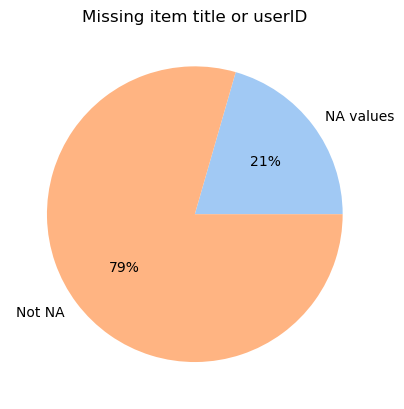

In [117]:
# obviously missing values from the title are part of the total of missing values of userID, i.e., both exist or not on a row
#define data
totalNa  = (checkNa["userID"] / len(df.index)) * 100
remaining = 100 - totalNa
data = [totalNa, remaining]
labels = ["NA values", "Not NA"]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

# create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Missing item title or userID")
plt.show()

In [118]:
# drop these values
df.dropna(inplace = True)
df.isna().sum()

title       0
quantity    0
price       0
userID      0
dtype: int64

In [119]:
# remaining entries
len(df.index)

417534

In [120]:
# reset indexing of rows for avoiding future errors after dropping rows
df.reset_index(drop = True, inplace = True)
df.head()

,title,quantity,price,userID
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0
1,PINK CHERRY LIGHTS,12,6.75,13085.0
2,WHITE CHERRY LIGHTS,12,6.75,13085.0
3,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0
4,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0


In [121]:
# check skewness for price and quantity features for further finding outliers
skewnessBefore = df.skew(numeric_only = True)
print(skewnessBefore)

quantity     62.709904
price       183.957685
userID       -0.016524
dtype: float64


In [122]:
# skewness for quantity and price are highly skewed because is greater than 1
# user id is fairly symmetrical being between -0.5 and 0.5

<AxesSubplot:xlabel='price'>

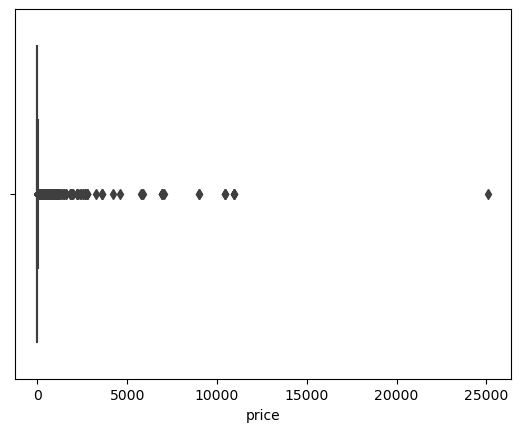

In [123]:
# use boxplot to visualize outliers for features: price and quantity
sns.boxplot(x=df["price"])

<AxesSubplot:xlabel='quantity'>

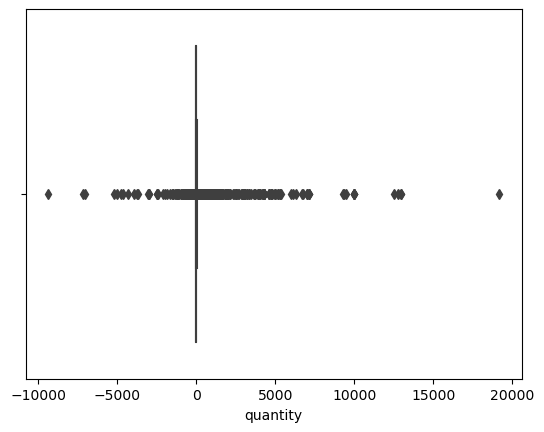

In [124]:
sns.boxplot(x=df["quantity"])

In [125]:
# now quantity as it can be seen quantity should not be <= 0, these being outliers of the quantity feature
# and it would not make sense as well to have interactions where the price is <= 0, so drop all of these values of both features
# there are some other for price as well

dropNegativeOrZeroPrice = np.where(df['price'] <= 0)
dropNegativeOrZeroQuantity = np.where(df['quantity'] <= 0)

df.drop(dropNegativeOrZeroPrice[0], inplace = True)
df.drop(dropNegativeOrZeroQuantity[0], inplace = True)

<AxesSubplot:xlabel='quantity'>

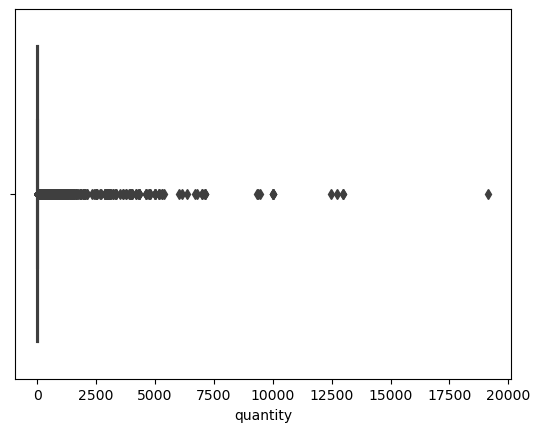

In [126]:
# let's the changes in the boxplot
sns.boxplot(x=df["quantity"])

<AxesSubplot:xlabel='price'>

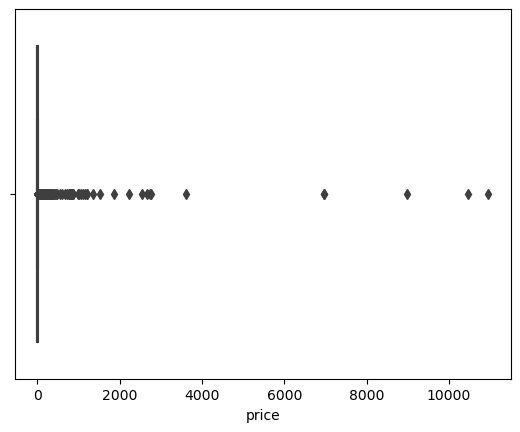

In [127]:
# let's the changes in the boxplot
sns.boxplot(x=df["price"])

In [128]:
# now there are items with quantity > 0
# but the actual problem here is that the this feature shows that there is no variability, 
# data not being spreaded which leads the boxplots
# showing that the interquartile range is 0
# https://stats.stackexchange.com/questions/282050/iqr-is-0-but-mean-is-not-0
# check the number of entries left
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407664 entries, 0 to 417533
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   title     407664 non-null  object 
 1   quantity  407664 non-null  int64  
 2   price     407664 non-null  float64
 3   userID    407664 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.6+ MB


In [129]:
# reset indexing of rows for avoiding future errors after dropping rows
df.reset_index(drop = True, inplace = True)
df.head()

,title,quantity,price,userID
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0
1,PINK CHERRY LIGHTS,12,6.75,13085.0
2,WHITE CHERRY LIGHTS,12,6.75,13085.0
3,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0
4,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0


In [130]:
# as it has be seen, this dataset according to the quantity and price, this dataset shows signs of an imbalanced one,
# saying only quantity 
# which leads to the potential use of k cross validation resampling procedure when training the model for the recommendation
# system
# now that some of the preprocessing part has been sorted out, the synthetization stageg will can start

(0.0, 1000.0)

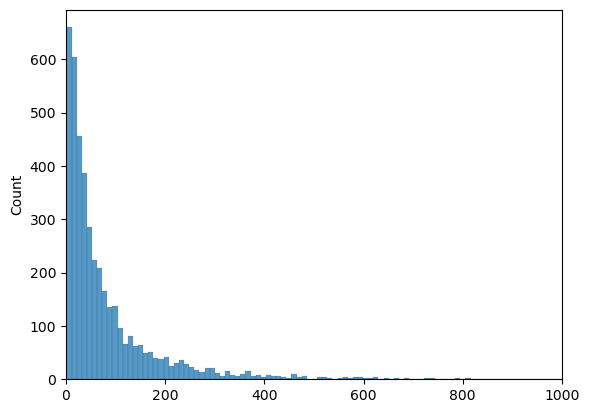

In [131]:
# let s plot the user ids frequency to see how many interactions are per user
userInteractionFreq = df.groupby(["userID"]).size()
sns.histplot(data=userInteractionFreq)
plt.xlim(0, 1000)

In [132]:
# as it can be seen, not all users ids have enough interactions relative to the whole dataset
# userID feature can be "synthetized" with the help of another dataset that has is used in a similar scenario
# enough interactions for all users this can be done with the help of another dataset that fulfills all the requirements
# needed for this dataset, what it can be done is to use the entries of user ids from this dataset
# the other dataset that will help in this case is used in a movie recommender instead of a product recommender which pretty
# close to the scope of this recommendation system
df_movies = pd.read_csv("recommendation-ratings-movies.csv")

In [133]:
df_movies.head()

,userId,movieId,rating,timestamp
0,1,1097,5.0,964981680
1,1,1127,4.0,964982513
2,1,1136,5.0,964981327
3,1,1196,5.0,964981827
4,1,1197,5.0,964981872


In [134]:
# now let's copy userId from the movies dataset into the interactions dataset for products
userIDs = df_movies["userId"].tolist()
userRatings = df_movies["rating"].tolist()
# drop the old IDs from the interactions dataset
df.drop(["userID"], axis=1, inplace = True)
df.head()

,title,quantity,price
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95
1,PINK CHERRY LIGHTS,12,6.75
2,WHITE CHERRY LIGHTS,12,6.75
3,"RECORD FRAME 7"" SINGLE SIZE",48,2.10
4,STRAWBERRY CERAMIC TRINKET BOX,24,1.25


In [135]:
# before inserting the IDs the size of this dataframe will be reduced to correspond with the movie dataset
df = df.loc[:99997]
df.head()

,title,quantity,price
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95
1,PINK CHERRY LIGHTS,12,6.75
2,WHITE CHERRY LIGHTS,12,6.75
3,"RECORD FRAME 7"" SINGLE SIZE",48,2.10
4,STRAWBERRY CERAMIC TRINKET BOX,24,1.25


In [136]:
# now insert the user IDs from the movies dataset into interactions dataset
df["userID"] = userIDs
df["rating"] = userRatings

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99998 entries, 0 to 99997
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     99998 non-null  object 
 1   quantity  99998 non-null  int64  
 2   price     99998 non-null  float64
 3   userID    99998 non-null  int64  
 4   rating    99998 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 3.8+ MB


In [138]:
# now the size has been reduced and there is a balanced number of interactions for the users

In [139]:
# insert the new IDs - note that this is the interactions dataset
df["userID"] = userIDs

In [140]:
df.head()

,title,quantity,price,userID,rating
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,1,5.0
1,PINK CHERRY LIGHTS,12,6.75,1,4.0
2,WHITE CHERRY LIGHTS,12,6.75,1,5.0
3,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,1,5.0
4,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,1,5.0


In [141]:
# to obtain these datasets it can be separated into two datasets: one with the unique items from the current dataset and one with 
# the interactions of users with items
interactions = df.copy()
items = interactions.copy()

In [142]:
# this can be done by dropping the duplicates according to the title column
# check for duplicates
items.duplicated(subset=["title"]).sum()

96598

In [143]:
# drop the duplicates
items.drop_duplicates(subset = ["title"], inplace=True)

In [144]:
# checking duplicated values
items.duplicated().sum()

0

In [145]:
# so the number of unique items that users have interacted with is
len(items.index)

3400

In [146]:
# interactions of users dataset does not have any item details like price (arguable over the use as feature for 
# the recommendation process, store, quantity or rating
# price can actually be used as a factor for the recommendation process but that will be done later
# for now the item rating and price will be used

# for the items dataset is needed: itemID, store, title, unit_price
# for interactions dataset: itemID, userID, rating, quantity

In [147]:
# so items does not need userID
items = items.drop(["quantity", "userID"], axis = 1)
items.head()

,title,price,rating
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6.95,5.0
1,PINK CHERRY LIGHTS,6.75,4.0
2,WHITE CHERRY LIGHTS,6.75,5.0
3,"RECORD FRAME 7"" SINGLE SIZE",2.10,5.0
4,STRAWBERRY CERAMIC TRINKET BOX,1.25,5.0


In [148]:
# now itemID wil be generated automatically : this is the synthetization process
# it will be just the index of the entries to not overthink it, it just needs to be unique
items["itemID"] = np.arange(items.shape[0])

In [149]:
# generated itemID column
items.head()

,title,price,rating,itemID
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6.95,5.0,0
1,PINK CHERRY LIGHTS,6.75,4.0,1
2,WHITE CHERRY LIGHTS,6.75,5.0,2
3,"RECORD FRAME 7"" SINGLE SIZE",2.10,5.0,3
4,STRAWBERRY CERAMIC TRINKET BOX,1.25,5.0,4


In [150]:
# lets synthetize the store column that will contain the store name from where an item can be bought
# assuming that these items were bought from 5 different stores where these stores can sell the same item
# in the database of the app there will be also the latitude and longitude coordinates of the store used for the geolocation 
# feature
stores = ["Tesco", "ASDA", "LIDL", "Sainsbury's", "ALDI"]
storesColumn = []
for i in range(len(items.index)):
    r = random.randint(0, 4)
    storesColumn.append(stores[r])

In [151]:
# append the column to the dataframe
items["storeName"] = storesColumn

In [152]:
items.head(10)

,title,price,rating,itemID,storeName
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6.95,5.0,0,Sainsbury's
1,PINK CHERRY LIGHTS,6.75,4.0,1,LIDL
2,WHITE CHERRY LIGHTS,6.75,5.0,2,ALDI
3,"RECORD FRAME 7"" SINGLE SIZE",2.10,5.0,3,LIDL
4,STRAWBERRY CERAMIC TRINKET BOX,1.25,5.0,4,ASDA
5,PINK DOUGHNUT TRINKET POT,1.65,5.0,5,Tesco
6,SAVE THE PLANET MUG,1.25,5.0,6,LIDL
7,FANCY FONT HOME SWEET HOME DOORMAT,5.95,4.0,7,ALDI
8,CAT BOWL,2.55,5.0,8,Sainsbury's
9,"DOG BOWL , CHASING BALL DESIGN",3.75,5.0,9,Tesco


In [153]:
# reset indexing of rows for avoiding future errors after dropping columns
items.reset_index(inplace = True)

In [154]:
# rearrange the columns
items = items[["itemID", "title", "price", "storeName"]]

In [155]:
items.head()

,itemID,title,price,storeName
0,0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6.95,Sainsbury's
1,1,PINK CHERRY LIGHTS,6.75,LIDL
2,2,WHITE CHERRY LIGHTS,6.75,ALDI
3,3,"RECORD FRAME 7"" SINGLE SIZE",2.10,LIDL
4,4,STRAWBERRY CERAMIC TRINKET BOX,1.25,ASDA


In [156]:
# now the intearctions dataset will be modified and synthetized correspondingly
# for interactions dataset: itemID, userID, rating, quantity
interactions.head()

,title,quantity,price,userID,rating
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,1,5.0
1,PINK CHERRY LIGHTS,12,6.75,1,4.0
2,WHITE CHERRY LIGHTS,12,6.75,1,5.0
3,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,1,5.0
4,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,1,5.0


In [159]:
# the itemID is needed in this dataset
itemID = []

# append all items' ID from the items dataframe to the interactions dataframe (there are also duplicates but that's because an
# item can have 1 > more interactions with an user)
dictItems = dict(zip(list(items["title"]), list(items["itemID"])))

for index, row in interactions.iterrows():
    itemID.append(dictItems[row["title"]])

In [160]:
# append the itemID column to the interactions column
interactions["itemID"] = itemID

In [161]:
interactions.head()

,title,quantity,price,userID,rating,itemID
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,1,5.0,0
1,PINK CHERRY LIGHTS,12,6.75,1,4.0,1
2,WHITE CHERRY LIGHTS,12,6.75,1,5.0,2
3,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,1,5.0,3
4,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,1,5.0,4


In [162]:
# drop columns that are not needed in this dataframe as well
interactions.drop(["title", "price"], axis = 1, inplace = True)

In [163]:
interactions.head()

,quantity,userID,rating,itemID
0,12,1,5.0,0
1,12,1,4.0,1
2,12,1,5.0,2
3,48,1,5.0,3
4,24,1,5.0,4


In [164]:
# rearrange the columns
interactions = interactions[["itemID", "userID", "rating", "quantity"]]
interactions.head()

,itemID,userID,rating,quantity
0,0,1,5.0,12
1,1,1,4.0,12
2,2,1,5.0,12
3,3,1,5.0,48
4,4,1,5.0,24


In [165]:
# final datasets
items.head()

,itemID,title,price,storeName
0,0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6.95,Sainsbury's
1,1,PINK CHERRY LIGHTS,6.75,LIDL
2,2,WHITE CHERRY LIGHTS,6.75,ALDI
3,3,"RECORD FRAME 7"" SINGLE SIZE",2.10,LIDL
4,4,STRAWBERRY CERAMIC TRINKET BOX,1.25,ASDA


In [166]:
interactions.head()

,itemID,userID,rating,quantity
0,0,1,5.0,12
1,1,1,4.0,12
2,2,1,5.0,12
3,3,1,5.0,48
4,4,1,5.0,24


In [167]:
# rearrange cols
interactions = interactions[["userID", "itemID", "rating", "quantity"]]

In [168]:
interactions.head()

,userID,itemID,rating,quantity
0,1,0,5.0,12
1,1,1,4.0,12
2,1,2,5.0,12
3,1,3,5.0,48
4,1,4,5.0,24


In [169]:
# export the files as csv files
items.to_csv(r"F:\Uni\ThirdYearUni\6001CEM - Individual Project\6001CEM_Project_P146018\ml-model-steps\datasets\items.csv", index=False, encoding='utf-8')

In [171]:
interactions.to_csv(r"F:\Uni\ThirdYearUni\6001CEM - Individual Project\6001CEM_Project_P146018\ml-model-steps\datasets\interactions.csv", index=False, encoding='utf-8')

In [172]:
# train test split and save the datasets for ml.net builder this is done on the interactions dataset, as the recommendation
#  will be based on interactions

interactions_train, interactions_test = train_test_split(interactions, test_size=0.3, train_size=0.7, random_state=25)

print(f"Training dataset entries count: {interactions_train.shape[0]}")
print(f"Testing dataset entries count: {interactions_test.shape[0]}")

Training dataset entries count: 69998
Testing dataset entries count: 30000


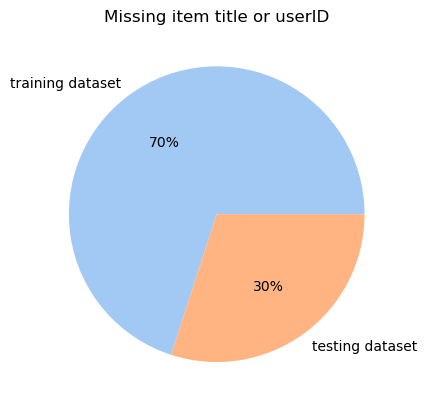

In [173]:
data = [interactions_train.shape[0], interactions_test.shape[0]]
labels = ["training dataset", "testing dataset"]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

# create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Missing item title or userID")
plt.show()

In [174]:
# save test train datasets
interactions_train.to_csv(r"F:\Uni\ThirdYearUni\6001CEM - Individual Project\6001CEM_Project_P146018\ml-model-steps\datasets\interactions_train.csv", index=False, encoding='utf-8')

In [175]:
interactions_test.to_csv(r"F:\Uni\ThirdYearUni\6001CEM - Individual Project\6001CEM_Project_P146018\ml-model-steps\datasets\interactions_test.csv", index=False, encoding='utf-8')